In [1]:
import sys
sys.path.append('..')

import random

from IPython.display import display

from aural_travels.data import soundcloud
from aural_travels.model.image_repr import VQGANImageRepr

from torchvision import transforms
import torchvision.transforms as T
import torchvision.transforms.functional as TF

In [2]:
DATA_DIR = '../../scdata'

dataset = soundcloud.CoverGenerationDataset(DATA_DIR, 'training')
image_repr = VQGANImageRepr()

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [33]:
import random
import math

def zoom_pair(image):
    width, height = image.size[0], image.size[1]
    assert width == height
    
    size1 = random.randint(1, width)
    
    x1 = random.uniform(size1/2, width - size1/2)
    y1 = random.uniform(size1/2, height - size1/2)

    if random.random() < 0.2:
        margin1 = 0
    else:
        margin1 = min(x1 - size1/2,
                      y1 - size1/2,
                      width - (x1 + size1/2),
                      height - (y1 + size1/2),
                      1.5 * size1)
        
    expand = random.uniform(0, margin1)
    size2 = size1 + expand
    
    if random.random() < 0.2:
        dx = 0
        dy = 0
    else:
        min_dx = -min(x1 - size2/2, 0.5 * size1, 64)
        max_dx = min(width - (x1 + size2/2), 0.5 * size1, 64)
        
        min_dy = -min(y1 - size2/2, 0.5 * size1, 64)
        max_dy = min(width - (y1 + size2/2), 0.5 * size1, 64)
        
        dx = random.uniform(min_dx, max_dx)
        dy = random.uniform(min_dy, max_dy)
    
    x2 = x1 + dx
    y2 = y1 + dy
    
    image1 = TF.crop(image, top=y1 - size1/2, left=x1 - size1/2, height=size1, width=size1)
    image2 = TF.crop(image, top=y2 - size2/2, left=x2 - size2/2, height=size2, width=size2)
    
    print(f'expand={expand:.4f}, dx={dx:.4f}, dy={dy:.4f}, margin1={margin1:.4f}, size1={size1}, size2={size2}')
    
    return image1, image2
    
def resize(image):
    s = min(image.size)
    r = 256 / s
    s = round(r * image.size[1]), round(r * image.size[0])
    print(s)
    #image = TF.resize(image, s, interpolation=TF.InterpolationMode.LANCZOS)
    image = TF.resize(image, s, interpolation=TF.InterpolationMode.NEAREST)

    return image

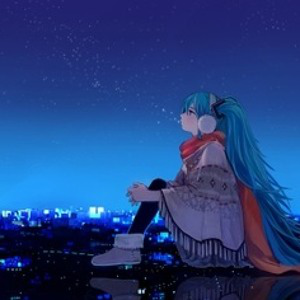

(256, 256)


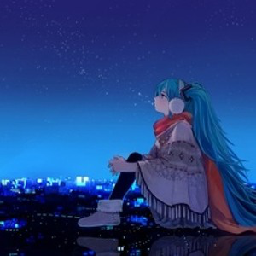

In [36]:
idx = 4

image = dataset[idx]['image']
display(image)
display(resize(image))

expand=0.0000, dx=6.3152, dy=5.5006, margin1=0.0000, size1=292, size2=292.0
crops
resizes
vqgans
(256, 256)
(256, 256)


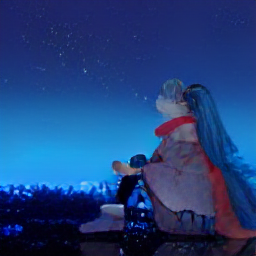

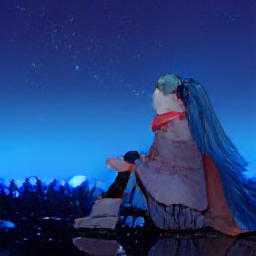

----------------------------
expand=9.9962, dx=-11.4504, dy=-2.0867, margin1=10.8740, size1=249, size2=258.99622264393787
crops
resizes
vqgans
(256, 256)
(256, 256)


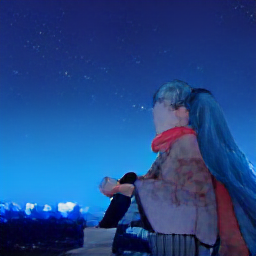

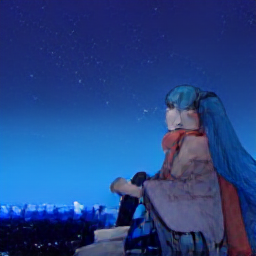

----------------------------
expand=0.9983, dx=-23.9948, dy=0.9019, margin1=3.5429, size1=265, size2=265.9982938347193
crops
resizes
vqgans
(256, 256)
(256, 256)


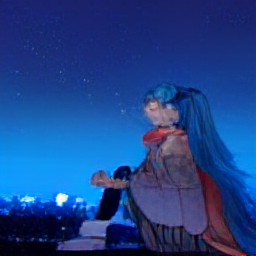

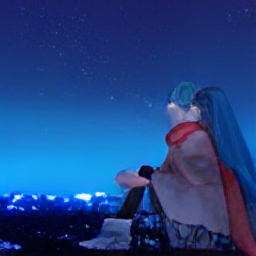

----------------------------
expand=0.0000, dx=-24.9861, dy=-4.8462, margin1=0.0000, size1=267, size2=267.0
crops
resizes
vqgans
(256, 256)
(256, 256)


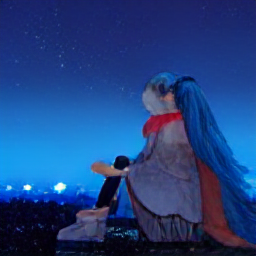

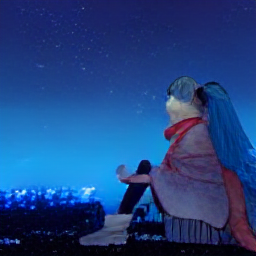

----------------------------
expand=17.4149, dx=0.0000, dy=0.0000, margin1=76.5000, size1=51, size2=68.41489904444322
crops
resizes
vqgans
(256, 256)
(256, 256)


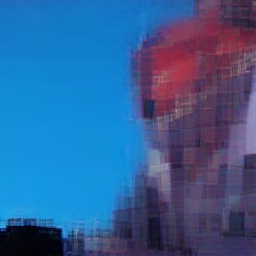

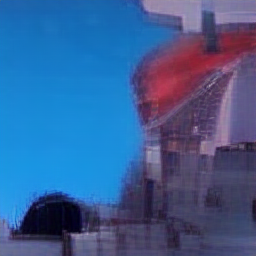

----------------------------
expand=6.8162, dx=26.9974, dy=-7.3382, margin1=20.9576, size1=92, size2=98.81619780657499
crops
resizes
vqgans
(256, 256)
(259, 256)


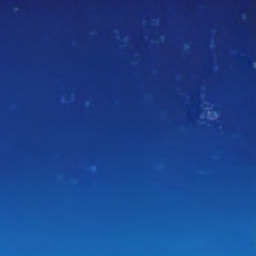

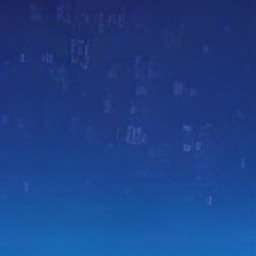

----------------------------
expand=0.0722, dx=0.6156, dy=-0.9716, margin1=3.0000, size1=2, size2=2.0721858545049563
crops
resizes
vqgans
(256, 256)
(256, 384)


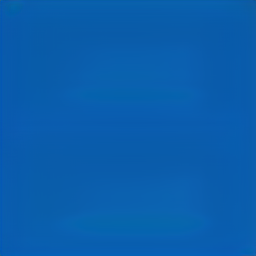

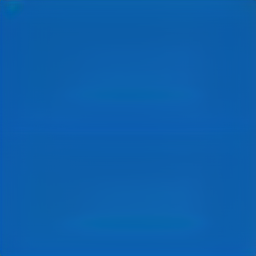

----------------------------
expand=0.0000, dx=-0.8330, dy=-0.7909, margin1=0.0000, size1=298, size2=298.0
crops
resizes
vqgans
(256, 256)
(256, 256)


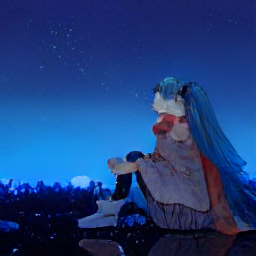

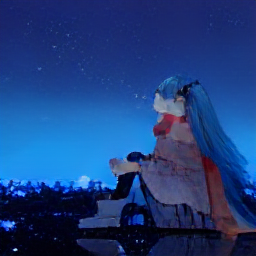

----------------------------
expand=0.0000, dx=-8.7459, dy=4.4239, margin1=0.0000, size1=215, size2=215.0
crops
resizes
vqgans
(256, 256)
(256, 256)


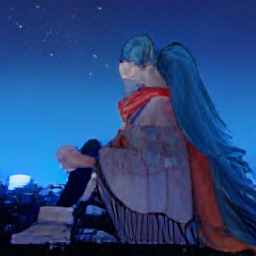

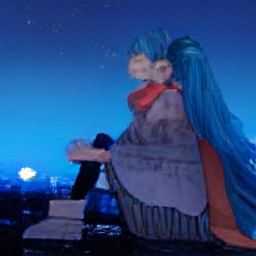

----------------------------
expand=51.1387, dx=0.0000, dy=0.0000, margin1=56.1487, size1=96, size2=147.13870798765592
crops
resizes
vqgans
(256, 256)
(256, 258)


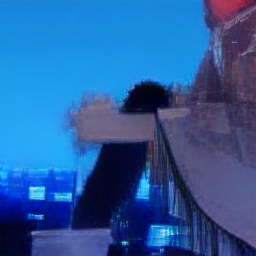

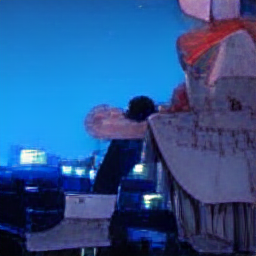

----------------------------


In [35]:
for i in range(10):
    image1, image2 = zoom_pair(image)
    print('crops')
    #display(image1, image2)
    print('resizes')
    #display(resize(image1), resize(image2))
    print('vqgans')
    display(image_repr.roundtrip(resize(image1)), image_repr.roundtrip(resize(image2)))
    print('----------------------------')